In [112]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv("mvc.csv", low_memory=False)
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/12/2020,19:40,NaN,NaN,40.763020,-73.770690,"(40.76302, -73.77069)",BELL BOULEVARD,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4272143,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,12/22/2019,2:00,NaN,NaN,40.843628,-73.832016,"(40.843628, -73.832016)",PLYMOUTH AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4262540,NaN,NaN,NaN,NaN,NaN
2,12/27/2019,15:10,NaN,NaN,40.704082,-73.816410,"(40.704082, -73.81641)",138 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4266567,Tractor Truck Diesel,Sedan,NaN,NaN,NaN
3,12/27/2019,6:40,NaN,NaN,40.709780,-73.820430,"(40.70978, -73.82043)",VAN WYCK EXPWY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4265181,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
4,01/01/2020,8:29,NaN,NaN,40.608223,-74.129400,"(40.608223, -74.1294)",STATEN ISLAND EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4267626,Sedan,Pick-up Truck,NaN,NaN,NaN
5,12/28/2019,21:10,NaN,NaN,40.835308,-73.943980,"(40.835308, -73.94398)",BROADWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4266113,Sedan,NaN,NaN,NaN,NaN
6,12/31/2019,18:08,NaN,NaN,40.604763,-74.027460,"(40.604763, -74.02746)",BELT PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4267324,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
7,01/19/2020,22:50,NaN,NaN,40.785150,-73.940630,"(40.78515, -73.94063)",FDR DRIVE,NaN,NaN,...,Unspecified,Unspecified,NaN,NaN,4275792,Sedan,Sedan,Sedan,NaN,NaN
8,01/11/2020,0:34,NaN,NaN,40.833588,-73.914980,"(40.833588, -73.91498)",EAST 167 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4271841,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
9,12/19/2019,16:22,NaN,NaN,40.586098,-73.932370,"(40.586098, -73.93237)",BELT PARKWAY,NaN,NaN,...,Unsafe Lane Changing,NaN,NaN,NaN,4261641,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [31]:
factors=df[["CONTRIBUTING FACTOR VEHICLE 1","CONTRIBUTING FACTOR VEHICLE 2","CONTRIBUTING FACTOR VEHICLE 3","CONTRIBUTING FACTOR VEHICLE 4","CONTRIBUTING FACTOR VEHICLE 5","NUMBER OF PERSONS INJURED","NUMBER OF PERSONS KILLED"]]
factors.loc[(factors["CONTRIBUTING FACTOR VEHICLE 1"]=="Unspecified")&((factors["CONTRIBUTING FACTOR VEHICLE 2"]!="Unspecified")&(factors["CONTRIBUTING FACTOR VEHICLE 2"].notna()))]

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED


In [32]:
factors=factors.loc[(factors["CONTRIBUTING FACTOR VEHICLE 1"]!="Unspecified")]
factors

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,0.0,0.0
3,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,1.0,0.0
4,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
5,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,1.0,0.0
6,Following Too Closely,Unspecified,NaN,NaN,NaN,0.0,0.0
7,Reaction to Uninvolved Vehicle,Unspecified,Unspecified,NaN,NaN,1.0,0.0
8,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,0.0,0.0
9,Passing or Lane Usage Improper,Unsafe Lane Changing,NaN,NaN,NaN,0.0,0.0


In [33]:
factors=factors.loc[factors["CONTRIBUTING FACTOR VEHICLE 1"].notna()].reset_index(drop=True)
factors

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
1,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,0.0,0.0
2,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,1.0,0.0
3,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
4,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,1.0,0.0
5,Following Too Closely,Unspecified,NaN,NaN,NaN,0.0,0.0
6,Reaction to Uninvolved Vehicle,Unspecified,Unspecified,NaN,NaN,1.0,0.0
7,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,0.0,0.0
8,Passing or Lane Usage Improper,Unsafe Lane Changing,NaN,NaN,NaN,0.0,0.0
9,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0


In [34]:
factors.head(100)

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
1,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,0.0,0.0
2,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,1.0,0.0
3,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
4,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,1.0,0.0
5,Following Too Closely,Unspecified,NaN,NaN,NaN,0.0,0.0
6,Reaction to Uninvolved Vehicle,Unspecified,Unspecified,NaN,NaN,1.0,0.0
7,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,0.0,0.0
8,Passing or Lane Usage Improper,Unsafe Lane Changing,NaN,NaN,NaN,0.0,0.0
9,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0


In [35]:
arr=["Unspecified","Other Vehicular","1","80"]
factors=factors.replace(arr,np.NaN)

In [36]:
factors.loc[factors["CONTRIBUTING FACTOR VEHICLE 1"]=="80"]

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED


In [39]:
factors.loc[(factors["CONTRIBUTING FACTOR VEHICLE 1"]=="Illness")|(factors["CONTRIBUTING FACTOR VEHICLE 1"]=="Illnes")]

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
389,Illness,NaN,NaN,NaN,NaN,2.0,0.0
2152,Illness,NaN,NaN,NaN,NaN,1.0,0.0
3652,Illness,NaN,NaN,NaN,NaN,1.0,0.0
5277,Illness,NaN,NaN,NaN,NaN,1.0,0.0
6007,Illness,NaN,NaN,NaN,NaN,0.0,0.0
6106,Illness,NaN,NaN,NaN,NaN,1.0,0.0
7703,Illness,NaN,NaN,NaN,NaN,1.0,0.0
7941,Illness,NaN,NaN,NaN,NaN,0.0,0.0
9130,Illness,NaN,NaN,NaN,NaN,1.0,0.0
9414,Illness,NaN,NaN,NaN,NaN,2.0,0.0


In [38]:
factors=factors.replace("Illnes","Illness")

In [41]:
factors.loc[(factors["CONTRIBUTING FACTOR VEHICLE 1"]=="Drugs (illegal)")|(factors["CONTRIBUTING FACTOR VEHICLE 1"]=="Drugs (Illegal)")]

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
284,Drugs (illegal),NaN,NaN,NaN,NaN,1.0,0.0
2545,Drugs (illegal),NaN,NaN,NaN,NaN,0.0,0.0
3625,Drugs (illegal),NaN,NaN,NaN,NaN,1.0,0.0
5976,Drugs (illegal),NaN,NaN,NaN,NaN,0.0,0.0
7878,Drugs (illegal),NaN,NaN,NaN,NaN,1.0,0.0
9744,Drugs (illegal),NaN,NaN,NaN,NaN,1.0,0.0
10144,Drugs (Illegal),NaN,NaN,NaN,NaN,0.0,0.0
11514,Drugs (illegal),NaN,NaN,NaN,NaN,1.0,0.0
13047,Drugs (illegal),NaN,NaN,NaN,NaN,1.0,0.0
13260,Drugs (illegal),NaN,NaN,NaN,NaN,0.0,0.0


In [42]:
factors=factors.replace("Drugs (illegal)","Drugs (Illegal)")

In [43]:
factors.loc[(factors["CONTRIBUTING FACTOR VEHICLE 1"]=="Cell Phone (hand-Held)")|(factors["CONTRIBUTING FACTOR VEHICLE 1"]=="Cell Phone (hand-held)")]

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
3446,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,0.0,0.0
5281,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,0.0,0.0
6654,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,0.0,0.0
9549,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,1.0,0.0
11426,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,1.0,0.0
14048,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,2.0,0.0
23779,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,0.0,0.0
25836,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,0.0,0.0
34264,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,0.0,0.0
35265,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,1.0,0.0


In [44]:
factors=factors.replace("Cell Phone (hand-Held)","Cell Phone (hand-held)")

In [45]:
factors=factors.replace("Reaction to Other Uninvolved Vehicle","Reaction to Uninvolved Vehicle")

In [46]:
factors=factors.rename(columns={"CONTRIBUTING FACTOR VEHICLE 1":"F1","CONTRIBUTING FACTOR VEHICLE 2":"F2","CONTRIBUTING FACTOR VEHICLE 3":"F3","CONTRIBUTING FACTOR VEHICLE 4":"F4","CONTRIBUTING FACTOR VEHICLE 5":"F5"})
factors

,F1,F2,F3,F4,F5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,0.0,0.0
1,Passing or Lane Usage Improper,NaN,NaN,NaN,NaN,0.0,0.0
2,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,1.0,0.0
3,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,0.0,0.0
4,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,1.0,0.0
5,Following Too Closely,NaN,NaN,NaN,NaN,0.0,0.0
6,Reaction to Uninvolved Vehicle,NaN,NaN,NaN,NaN,1.0,0.0
7,Passing or Lane Usage Improper,NaN,NaN,NaN,NaN,0.0,0.0
8,Passing or Lane Usage Improper,Unsafe Lane Changing,NaN,NaN,NaN,0.0,0.0
9,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,0.0,0.0


In [47]:
factors=factors.loc[(factors["F1"].notna())|(factors["F2"].notna())|(factors["F3"].notna())|(factors["F4"].notna())|(factors["F5"].notna())].reset_index(drop=True)
factors

,F1,F2,F3,F4,F5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,0.0,0.0
1,Passing or Lane Usage Improper,NaN,NaN,NaN,NaN,0.0,0.0
2,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,1.0,0.0
3,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,0.0,0.0
4,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,1.0,0.0
5,Following Too Closely,NaN,NaN,NaN,NaN,0.0,0.0
6,Reaction to Uninvolved Vehicle,NaN,NaN,NaN,NaN,1.0,0.0
7,Passing or Lane Usage Improper,NaN,NaN,NaN,NaN,0.0,0.0
8,Passing or Lane Usage Improper,Unsafe Lane Changing,NaN,NaN,NaN,0.0,0.0
9,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,0.0,0.0


In [55]:
f1=factors.groupby(["F1"])
f1_injured_sum=f1["NUMBER OF PERSONS INJURED"].sum()
f2=factors.groupby(["F2"])
f2_injured_sum=f2["NUMBER OF PERSONS INJURED"].sum()
f3=factors.groupby(["F3"])
f3_injured_sum=f3["NUMBER OF PERSONS INJURED"].sum()
f4=factors.groupby(["F4"])
f4_injured_sum=f4["NUMBER OF PERSONS INJURED"].sum()
f5=factors.groupby(["F5"])
f5_injured_sum=f5["NUMBER OF PERSONS INJURED"].sum()
f1_injured_sum

F1
Accelerator Defective                                       77.0
Aggressive Driving/Road Rage                               760.0
Alcohol Involvement                                       1971.0
Animals Action                                              71.0
Backing Unsafely                                           971.0
Brakes Defective                                           665.0
Cell Phone (hand-held)                                      68.0
Cell Phone (hands-free)                                     13.0
Driver Inattention/Distraction                           26229.0
Driver Inexperience                                       1544.0
Driverless/Runaway Vehicle                                  48.0
Drugs (Illegal)                                            179.0
Eating or Drinking                                           3.0
Failure to Keep Right                                      215.0
Failure to Yield Right-of-Way                             7415.0
Fatigued/Drowsy       

In [95]:
f1_killed_sum=f1["NUMBER OF PERSONS KILLED"].sum()
f2_killed_sum=f2["NUMBER OF PERSONS KILLED"].sum()
f3_killed_sum=f3["NUMBER OF PERSONS KILLED"].sum()
f4_killed_sum=f4["NUMBER OF PERSONS KILLED"].sum()
f5_killed_sum=f5["NUMBER OF PERSONS KILLED"].sum()
f1_killed_sum

F1
Accelerator Defective                                      0.0
Aggressive Driving/Road Rage                               1.0
Alcohol Involvement                                       27.0
Animals Action                                             0.0
Backing Unsafely                                           6.0
Brakes Defective                                           0.0
Cell Phone (hand-held)                                     0.0
Cell Phone (hands-free)                                    0.0
Driver Inattention/Distraction                            66.0
Driver Inexperience                                        7.0
Driverless/Runaway Vehicle                                 1.0
Drugs (Illegal)                                            0.0
Eating or Drinking                                         0.0
Failure to Keep Right                                      1.0
Failure to Yield Right-of-Way                             14.0
Fatigued/Drowsy                                     

In [99]:
f1_count=f1["NUMBER OF PERSONS KILLED"].count()
f2_count=f2["NUMBER OF PERSONS KILLED"].count()
f3_count=f3["NUMBER OF PERSONS KILLED"].count()
f4_count=f4["NUMBER OF PERSONS KILLED"].count()
f5_count=f5["NUMBER OF PERSONS KILLED"].count()
f1_count

F1
Accelerator Defective                                      136
Aggressive Driving/Road Rage                              1644
Alcohol Involvement                                       3520
Animals Action                                             354
Backing Unsafely                                          9420
Brakes Defective                                          1307
Cell Phone (hand-held)                                     138
Cell Phone (hands-free)                                     41
Driver Inattention/Distraction                           83568
Driver Inexperience                                       5332
Driverless/Runaway Vehicle                                 210
Drugs (Illegal)                                            241
Eating or Drinking                                          30
Failure to Keep Right                                      643
Failure to Yield Right-of-Way                            18246
Fatigued/Drowsy                                     

In [111]:
filler=factors["F1"].unique()
filler = filler[~pd.isnull(filler)]
filler = pd.Series(np.zeros(len(filler)),filler)
filler

Driver Inattention/Distraction                           0.0
Passing or Lane Usage Improper                           0.0
Failure to Yield Right-of-Way                            0.0
Following Too Closely                                    0.0
Reaction to Uninvolved Vehicle                           0.0
Oversized Vehicle                                        0.0
Unsafe Lane Changing                                     0.0
Unsafe Speed                                             0.0
Turning Improperly                                       0.0
Fatigued/Drowsy                                          0.0
Traffic Control Disregarded                              0.0
Outside Car Distraction                                  0.0
Passing Too Closely                                      0.0
View Obstructed/Limited                                  0.0
Pavement Slippery                                        0.0
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion    0.0
Driver Inexperience     

In [101]:
f2_injured_sum=filler.combine(f2_injured_sum,max, fill_value=0.0)
f3_injured_sum=filler.combine(f3_injured_sum,max, fill_value=0.0)
f4_injured_sum=filler.combine(f4_injured_sum,max, fill_value=0.0)
f5_injured_sum=filler.combine(f5_injured_sum,max, fill_value=0.0)
f2_killed_sum=filler.combine(f2_killed_sum,max, fill_value=0.0)
f3_killed_sum=filler.combine(f3_killed_sum,max, fill_value=0.0)
f4_killed_sum=filler.combine(f4_killed_sum,max, fill_value=0.0)
f5_killed_sum=filler.combine(f5_killed_sum,max, fill_value=0.0)
f2_count=filler.combine(f2_count,max, fill_value=0.0)
f3_count=filler.combine(f3_count,max, fill_value=0.0)
f4_count=filler.combine(f4_count,max, fill_value=0.0)
f5_count=filler.combine(f5_count,max, fill_value=0.0)
f5_injured_sum

Accelerator Defective                                     0.0
Aggressive Driving/Road Rage                              0.0
Alcohol Involvement                                      14.0
Animals Action                                            0.0
Backing Unsafely                                          0.0
Brakes Defective                                          0.0
Cell Phone (hand-held)                                    0.0
Cell Phone (hands-free)                                   0.0
Driver Inattention/Distraction                           52.0
Driver Inexperience                                       2.0
Driverless/Runaway Vehicle                                0.0
Drugs (Illegal)                                           0.0
Eating or Drinking                                        0.0
Failure to Keep Right                                     1.0
Failure to Yield Right-of-Way                             3.0
Fatigued/Drowsy                                          25.0
Fell Asl

In [93]:
injured_sum=f1_injured_sum+f2_injured_sum+f3_injured_sum+f4_injured_sum+f5_injured_sum
injured_sum

F1
Accelerator Defective                                      159.0
Aggressive Driving/Road Rage                              1528.0
Alcohol Involvement                                       3998.0
Animals Action                                             142.0
Backing Unsafely                                          1957.0
Brakes Defective                                          1334.0
Cell Phone (hand-held)                                     138.0
Cell Phone (hands-free)                                     26.0
Driver Inattention/Distraction                           53304.0
Driver Inexperience                                       3128.0
Driverless/Runaway Vehicle                                  96.0
Drugs (Illegal)                                            358.0
Eating or Drinking                                           6.0
Failure to Keep Right                                      439.0
Failure to Yield Right-of-Way                            14863.0
Fatigued/Drowsy       

In [98]:
killed_sum=f1_killed_sum+f2_killed_sum+f3_killed_sum+f4_killed_sum+f5_killed_sum
killed_sum

F1
Accelerator Defective                                      0.0
Aggressive Driving/Road Rage                               1.0
Alcohol Involvement                                       29.0
Animals Action                                             0.0
Backing Unsafely                                           8.0
Brakes Defective                                           0.0
Cell Phone (hand-held)                                     0.0
Cell Phone (hands-free)                                    0.0
Driver Inattention/Distraction                            77.0
Driver Inexperience                                        7.0
Driverless/Runaway Vehicle                                 1.0
Drugs (Illegal)                                            0.0
Eating or Drinking                                         0.0
Failure to Keep Right                                      1.0
Failure to Yield Right-of-Way                             14.0
Fatigued/Drowsy                                     

In [102]:
count_sum=f1_count+f2_count+f3_count+f4_count+f5_count
count_sum

F1
Accelerator Defective                                       151.0
Aggressive Driving/Road Rage                               1980.0
Alcohol Involvement                                        3742.0
Animals Action                                              374.0
Backing Unsafely                                          10449.0
Brakes Defective                                           1391.0
Cell Phone (hand-held)                                      156.0
Cell Phone (hands-free)                                      44.0
Driver Inattention/Distraction                           103175.0
Driver Inexperience                                        6420.0
Driverless/Runaway Vehicle                                  232.0
Drugs (Illegal)                                             262.0
Eating or Drinking                                           31.0
Failure to Keep Right                                       776.0
Failure to Yield Right-of-Way                             20889.0
Fatigue

In [126]:
injured_per_occurance=injured_sum/count_sum
injured_per_occurance.sort_values(axis=0, ascending=False, inplace=True)
injured_per_occurance

F1
Illness                                                  1.556793
Drugs (Illegal)                                          1.366412
Unsafe Speed                                             1.267687
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion    1.228327
Traffic Control Disregarded                              1.149245
Alcohol Involvement                                      1.068413
Accelerator Defective                                    1.052980
Fell Asleep                                              0.997551
Brakes Defective                                         0.959022
Other Lighting Defects                                   0.944444
Cell Phone (hand-held)                                   0.884615
Shoulders Defective/Improper                             0.880000
Tire Failure/Inadequate                                  0.781250
Using On Board Navigation Device                         0.775510
Aggressive Driving/Road Rage                             0.771717
Steerin

In [107]:
killed_per_occurance=killed_sum/count_sum
killed_per_occurance.sort_values(axis=0, ascending=False, inplace=True)
killed_per_occurance

F1
Illness                                                  0.051225
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion    0.018649
Unsafe Speed                                             0.016274
Alcohol Involvement                                      0.007750
Physical Disability                                      0.006270
Pavement Defective                                       0.006250
Passenger Distraction                                    0.005336
Lost Consciousness                                       0.005042
Traffic Control Disregarded                              0.005032
Driverless/Runaway Vehicle                               0.004310
Failure to Keep Right                                    0.001289
Tire Failure/Inadequate                                  0.001202
Glare                                                    0.001164
Driver Inexperience                                      0.001090
View Obstructed/Limited                                  0.001044
Outside

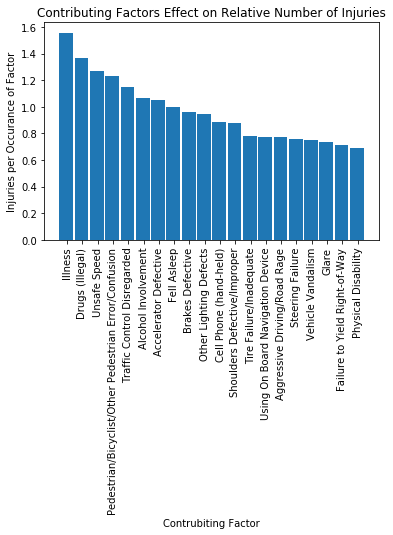

In [128]:
plt.bar(np.arange(20)-.05,injured_per_occurance.head(20),width=.90)
plt.grid(b=False)
plt.xticks(np.arange(20), injured_per_occurance.head(20).index, rotation='vertical');
plt.title('Contributing Factors Effect on Relative Number of Injuries')
plt.xlabel('Contrubiting Factor')
plt.ylabel('Injuries per Occurance of Factor');

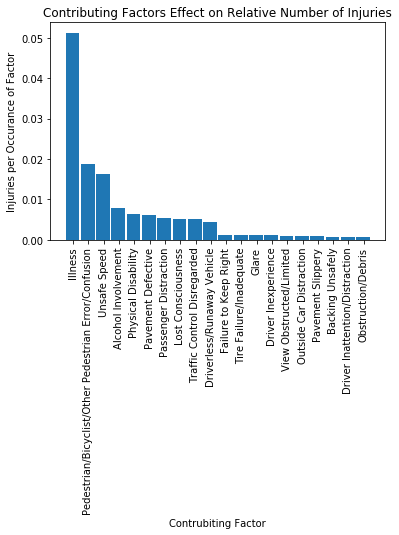

In [129]:
plt.bar(np.arange(20)-.05,killed_per_occurance.head(20),width=.90)
plt.grid(b=False)
plt.xticks(np.arange(20), killed_per_occurance.head(20).index, rotation='vertical');
plt.title('Contributing Factors Effect on Relative Number of Deaths')
plt.xlabel('Contrubiting Factor')
plt.ylabel('Deaths per Occurance of Factor');